# Python for Time Series

## Introduction to Statsmodels

- Statsmodels is a Python module that provides classes & functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration.

### Trends

- Time Series 는 어떠한 형태이건 Trends 를 가짐
1. Upward
2. Horizontal/Stationary
3. Downward

### Seasonality - Repeating Trends

### Cyclical - Trends with no set repetition

- 주기(기간)가 분명하다면 Seasonality, 주기(기간)가 분명하지 않다면 Cyclical

### Hodric-Prescott Filter

- The Hodric-Prescott Filter separates a time-series $Y_t$ into a trend component $\tau_t$ and a cyclical component $C_t$
- $Y_t = \tau_t + C_t$

- The components are determined by minimizing the following quadratic loss, where $\lambda$ is a smoothing parameter (평활화 파라미터)
- The $\lambda$ value above handles variatios in the growth rate of the trend component.
- the default $\lambda$ value
  1. quarterly data : 1600
  2. annual data : 6.25
  3. monthly data : 129,600
- $min_{\tau_t}\sum_{t=1}^{T}c_t^2 + \lambda\sum_{t=1}^{T}[(\tau_t - \tau_{t-1}) - (\tau_{t-1} - \tau_{t-2})]^2$

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./macrodata.csv', index_col=0, parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

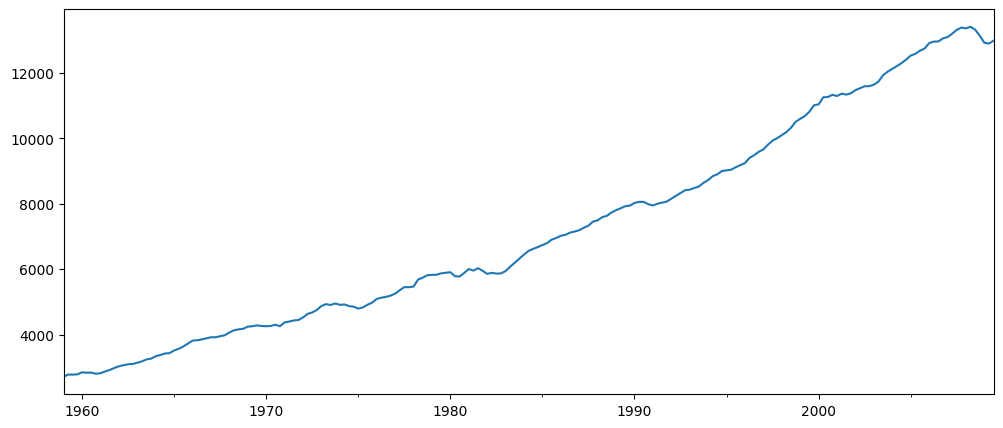

In [5]:
df['realgdp'].plot(figsize=(12,5))

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [9]:
hpfilter(df['realgdp'], lamb=1600)

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [10]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [11]:
type(gdp_trend)

pandas.core.series.Series

<Axes: >

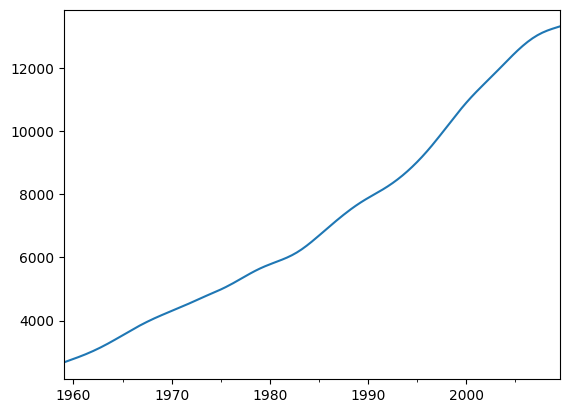

In [12]:
gdp_trend.plot()

In [13]:
df['trend'] = gdp_trend

In [14]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

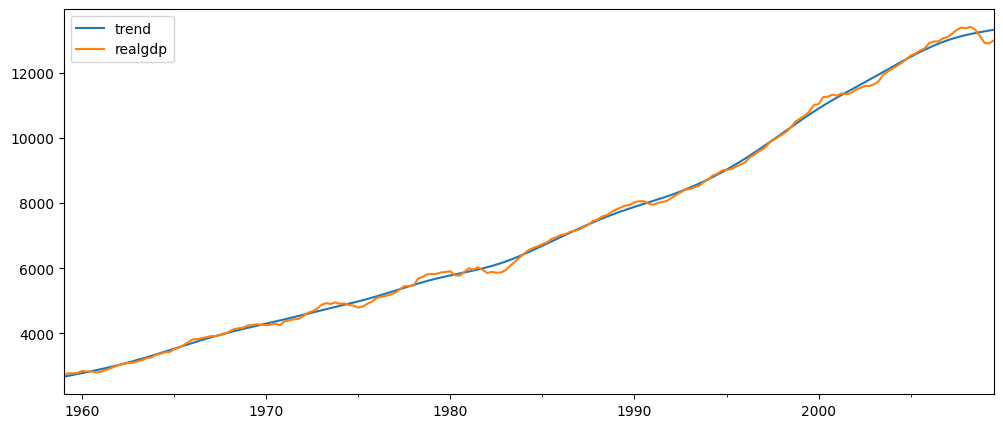

In [15]:
df[['trend', 'realgdp']].plot(figsize=(12,5))

<Axes: >

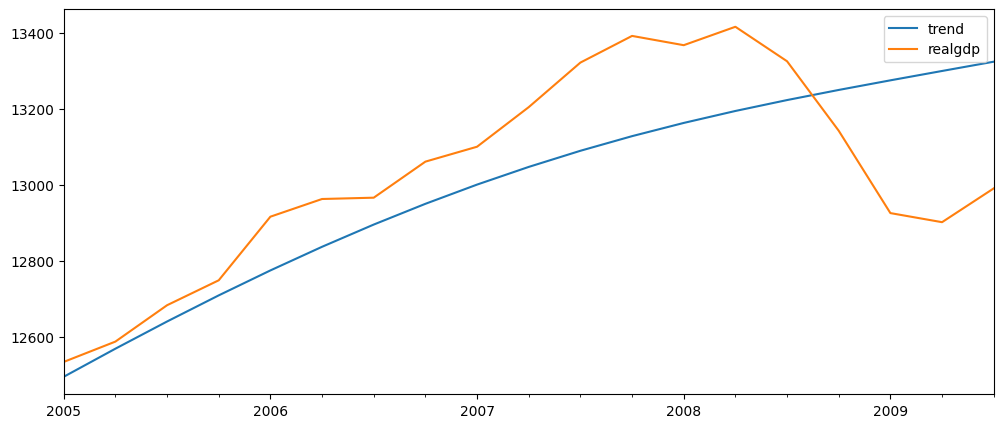

In [18]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5))

## ETS Decomposition

### ETS Models (Error-Trend-Seasonality)

- Exponential Smoothing
- Trend Methods Models
- ETS Decomposition
- ETS Model 은 다양한 모델을 포함하는 것으로 ETS 분해(Decomposition)는 그 모델 중 하나임

- Statsmodels provides a seasonal decomposition tool we can use to separate out the different components
- ETS Models will take each of those terms for "smoothing" and may add them, multiply them, or even just leave some of them out
- Based off these key factors, we can try to create a model to fit our data

### Time Series Decomposition with ETS (Error-Trend-Seasonality)

- Visualizing the data based off its ETS is a good way to build an understanding of its behavior
- 4개의 plot 제공
  1. Observed : 원계열 데이터
  2. Trend : 추세(Upward, Downward, Stationary)
  3. Seasonal : 반복 주기
  4. Residual = Error, White Noise

- We apply an <b>additive model</b> when it seems that the <u>tread is more linear and the seasonality and trend components seem to be constant over time</u> (e.g. every year add 10,000 passengers)
- A <b>multiplicative model</b> is more appropriate when we are <u>increasing (or decreasing) at a non-linear rate</u> (e.g. each year we double the amount of passenger)

In [19]:
import numpy as np
import pandas as pd
%matplotlib inline

In [24]:
airline = pd.read_csv('./airline_passengers.csv', index_col='Month', parse_dates=True)

In [26]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [28]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [29]:
airline = airline.dropna()

In [36]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


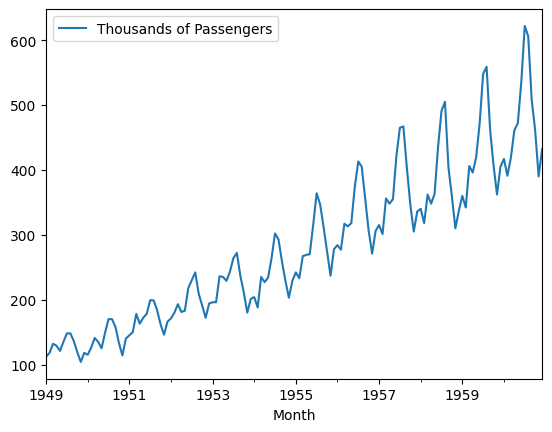

In [32]:
airline.plot();

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
result = seasonal_decompose(airline['Thousands of Passengers'], 
                            model='multiplicative')

In [46]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

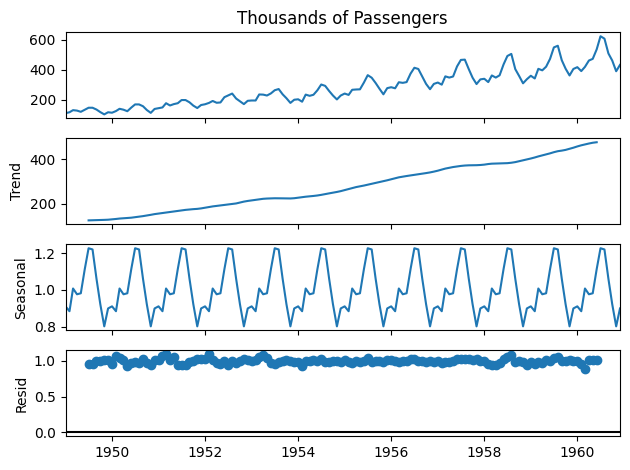

In [45]:
result.plot();

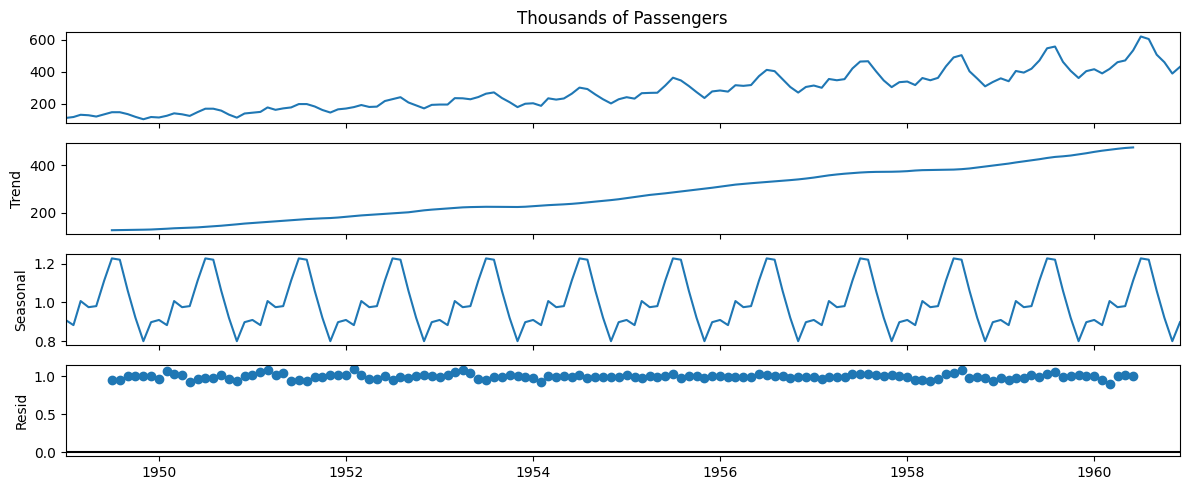

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

result.plot();

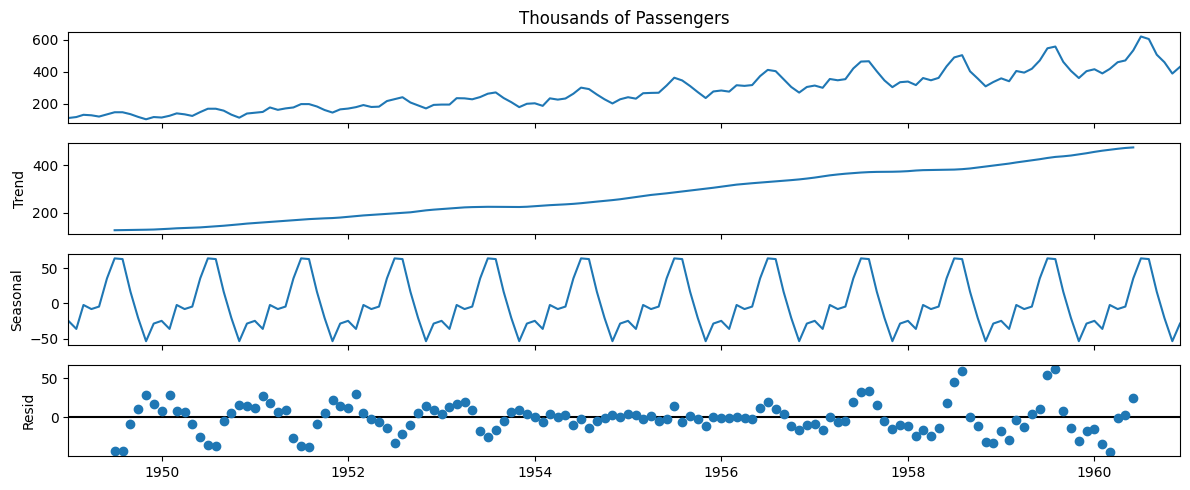

In [51]:
seasonal_decompose(airline['Thousands of Passengers'], 
                   model='additive').plot();

## Moving Averages

### SMA Model

- SMA : Simple Moving Averages (단순 이동 평균)
- We could theoretically attempt to use these simple moving averages to build a generalized model for the real world time series we're analyzing

### EWMA Models

- We could expand off the idea of an SMA (Simple Moving Averages) by utilizing a <b>EWMA (Exponentially Weighted Moving Averages)</b>
- As issue with SMA is that the entire model will be constrained to the same window size
- 전체 모델이 같은 이동 평균 기간(예. 6개월, 12개월)으로 제한된다는 의미로 데이터셋의 길이가 6개월이나 12개월보다 휠신 길더라도 (예. 10년, 20년) 데이터넷 전체에 똑같이 적용됨
- 즉, 데이터셋 기간에 관계없이 1개의 이동 평균 기간만이 적용됨
- It would be nice if we could have more recent data be <b>weighted</b> more than older data
- EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occurred more recently (by applying more weight to the more recent values, thus the name)
- The amount of weighted applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size

- Basic SMA have some "weaknesses"
  * Smaller windows will lead to more noise, rather that signal
  * It will always lag by the size of the window : 이동 평균 기간만큼 시차 발생
  * It will never reach to full peak or valley of the date due to the averaging : 이동 평균값이 데이터의 극대값 또는 극소값에 이르지 못 함
  * Does not really inform you about possible future behavior, all it really does it describe trends in your data : 미래 변동에 대해 어떠한 정보도 가지고 있지 않음
  * Exteme historical values can skew your SMA significantly : 이동 평균 기간에 따라 이동평균값이 왜곡되는 현상 발생
- To help fix some of these issues, we can use an EWMA

### SMA Lab

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
airline = pd.read_csv('./airline_passengers.csv', 
                      index_col='Month', 
                      parse_dates=True)

In [59]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [60]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [61]:
airline.dropna(inplace=True)

In [62]:
airline.index = pd.to_datetime(airline.index)

In [63]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [64]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [66]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [69]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [71]:
airline.tail()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


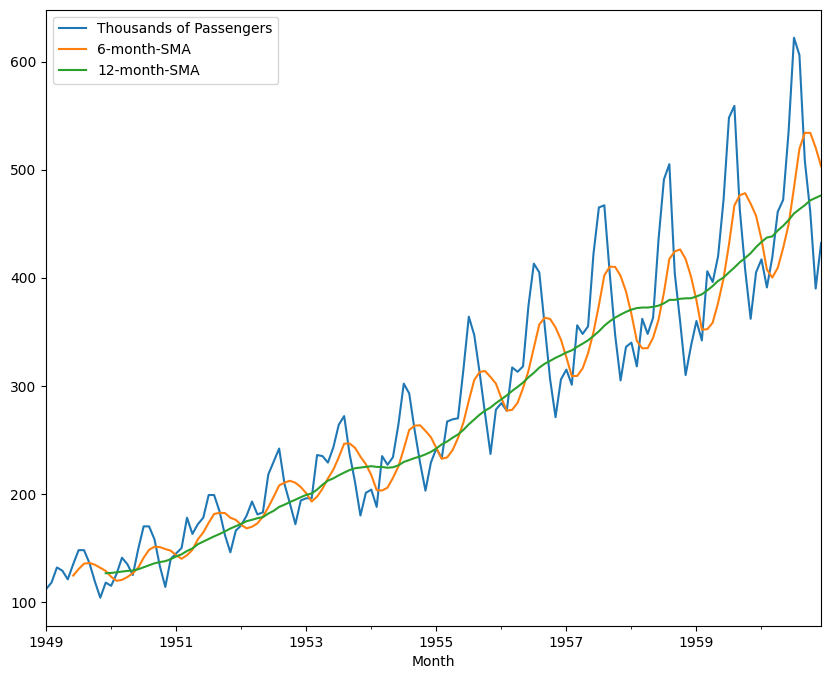

In [75]:
airline.plot(figsize=(10,8));

### EWMA Lab

In [76]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

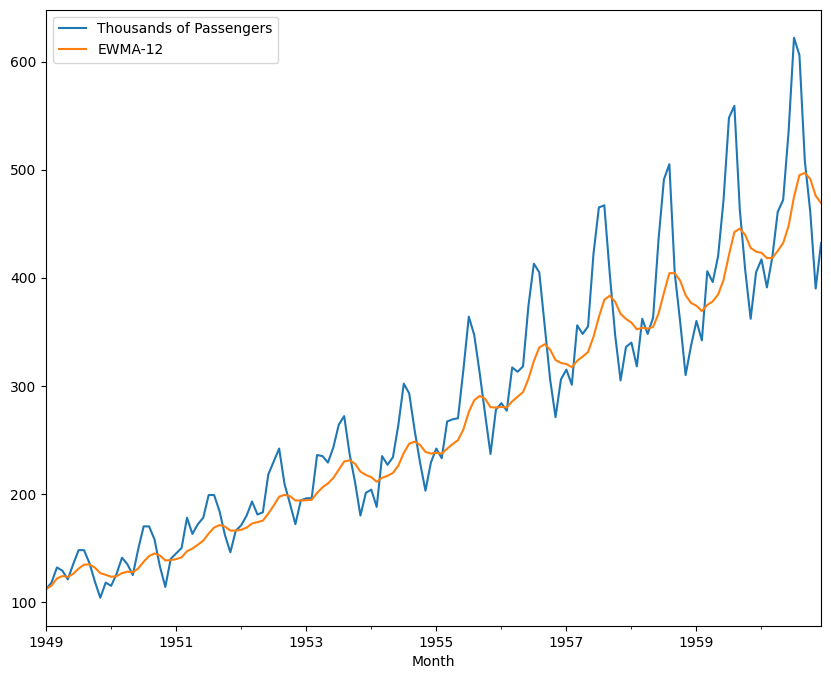

In [78]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8));

In [ ]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

The formular for EWMA is:
$y_t = \frac{\sum_{i=0}^{t}w_ix_{t-i}}{\sum_{i=0}^{t}w_i}$

w 값은 `.ewm()` 의 adjust 매개변수이며, 기본값은 True 임

$y_t = \frac{x_t+(1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+...+(1-\alpha)^tx_{0}}{1+(1-\alpha)+(1-\alpha)^2+...+(1-\alpha)^t}$

## Holt Winters Methods

## Statsmodels Time Series Exercises